# Importing Feb, Mar, Apr, May CSV files

These files have been marked with 1 for Interesting and 0 if not interesting

In [190]:
import pandas as pd
import numpy as np


def get_clean_df(csv_filepath):
    month_df = pd.read_csv(csv_filepath) 
    month_df['Interesting'] = month_df['Interesting'].fillna(0)
    month_df['Bizarre'] = month_df['Bizarre'].fillna(0)
    return month_df

df_feb_24 = get_clean_df('feb_24_marked_official.csv') 
df_mar_24 = get_clean_df('mar_24_marked_official.csv') 
df_apr_24 = get_clean_df('apr_24_marked_official.csv') 
df_may_24 = get_clean_df('may_24_marked_official.csv') 

#pd.concat combines all these dataframes into a single dataframe.
df_crime_logs = pd.concat([df_feb_24, df_mar_24, df_apr_24, df_may_24], ignore_index=True)

In [186]:
df_crime_logs

,Incident Type,Location,Date,Time,Summary,Disposition,Interesting,Bizarre
0,Unknown Trouble,One Miramar Street,2/1/2024,12:12 AM,Reporting party hears what sounds like a lady ...,Unable to locate,0.0,0.0
1,Noise Disturbance,Viento,2/1/2024,1:54 AM,Loud signing and moving chairs,Referred to Student Conduct,0.0,0.0
2,Noise Disturbance,Seventh College West #2,2/1/2024,2:30 AM,Group outside of building talking and laughing...,Unable to locate,0.0,0.0
3,Petty Theft,Epstein Family Amphitheater,2/1/2024,6:22 AM,Non-affiliate adult male stole weather equipme...,Report Taken,0.0,0.0
4,Citizen Contact,UCSD Police Department,2/1/2024,11:01 AM,Female requesting assistance with fix it ticket,Service Provided,0.0,0.0
...,...,...,...,...,...,...,...,...
2337,Gas/ Water/ Sewer Leak,Ocean View Terrace,5/31/2024,11:49 PM,Broken sprinkler on the west side,Referred To Other Department- Facility Mainten...,0.0,0.0
2338,Petty Theft,RIMAC West Side,5/31/2024,12:30 PM,"Theft of Trek 10 speed bike, loss is $150.00",Report Taken,0.0,0.0
2339,Petty Theft,Target Bike Racks,5/31/2024,12:00 PM - 5:00 PM,"Theft of a bike, loss is $138.16.",Report Taken,0.0,0.0
2340,Battery,UCSD Medical Center La Jolla,5/31/2024,12:15 AM,"Patient assaulted staff, upset and refusing tr...",Report Taken,1.0,0.0


# Automated Data Cleaning 

First python cell imports packages and initializes stop word removal and stemming functions

Next Python cell creates the data cleaning function that:

1. Drop all NaN rows
2. Create a new column "tokenized" column that is a copy of the "Summary" column except lowercase
3. Remove punctuation from "tokenized"
4. Remove stop words from "tokenized"
5. Apply stemming to "tokenized"



In [191]:
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def remove_stop_words(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stop words
    return ' '.join(tokens)


stemmer = PorterStemmer()

def stem_text(text):
    tokens = word_tokenize(text)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

In [201]:
def data_cleaning_fcn(any_df):
    # Drop rows with missing values
    any_df = any_df.dropna().copy()

    # Apply lowercase transformation to 'Summary' and create 'tokenized' column
    any_df.loc[:, 'tokenized'] = any_df['Summary'].apply(lambda x: x.lower() if isinstance(x, str) else x)

    # Remove punctuation from 'tokenized'
    any_df.loc[:, 'tokenized'] = any_df['tokenized'].str.replace(f'[{string.punctuation}]', '', regex=True)

     # Remove stop words from 'tokenized'
    any_df.loc[:, 'tokenized'] = any_df['tokenized'].apply(remove_stop_words)

    # Apply stemming to 'tokenized'
    any_df.loc[:, 'tokenized'] = any_df['tokenized'].apply(stem_text)

    return any_df


crime_logs_cleant_df = data_cleaning_fcn(df_crime_logs) 

In [202]:
crime_logs_cleant_df

,Incident Type,Location,Date,Time,Summary,Disposition,Interesting,Bizarre,tokenized
0,Unknown Trouble,One Miramar Street,2/1/2024,12:12 AM,Reporting party hears what sounds like a lady ...,Unable to locate,0.0,0.0,report parti hear sound like ladi cri
1,Noise Disturbance,Viento,2/1/2024,1:54 AM,Loud signing and moving chairs,Referred to Student Conduct,0.0,0.0,loud sign move chair
2,Noise Disturbance,Seventh College West #2,2/1/2024,2:30 AM,Group outside of building talking and laughing...,Unable to locate,0.0,0.0,group outsid build talk laugh loudli past hour...
3,Petty Theft,Epstein Family Amphitheater,2/1/2024,6:22 AM,Non-affiliate adult male stole weather equipme...,Report Taken,0.0,0.0,nonaffili adult male stole weather equip loss ...
4,Citizen Contact,UCSD Police Department,2/1/2024,11:01 AM,Female requesting assistance with fix it ticket,Service Provided,0.0,0.0,femal request assist fix ticket
...,...,...,...,...,...,...,...,...,...
2337,Gas/ Water/ Sewer Leak,Ocean View Terrace,5/31/2024,11:49 PM,Broken sprinkler on the west side,Referred To Other Department- Facility Mainten...,0.0,0.0,broken sprinkler west side
2338,Petty Theft,RIMAC West Side,5/31/2024,12:30 PM,"Theft of Trek 10 speed bike, loss is $150.00",Report Taken,0.0,0.0,theft trek 10 speed bike loss 15000
2339,Petty Theft,Target Bike Racks,5/31/2024,12:00 PM - 5:00 PM,"Theft of a bike, loss is $138.16.",Report Taken,0.0,0.0,theft bike loss 13816
2340,Battery,UCSD Medical Center La Jolla,5/31/2024,12:15 AM,"Patient assaulted staff, upset and refusing tr...",Report Taken,1.0,0.0,patient assault staff upset refus transport


# Using sklearn to divide into training and test sets. 

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test , Y_train, Y_test = train_test_split(crime_logs_cleant_df['tokenized'],
                                                     crime_logs_cleant_df['Interesting'],
                                                     test_size=0.2,
                                                     random_state=42)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

In [47]:
print(X_train[:5], Y_train[:5], type(X_train), type(Y_train))
print(X_test[:5], Y_test[:5], type(X_test), type(Y_test))

0    parent advis hasnt heard student week unusu be...
1                  water leak 1st floor custodi closet
2     residenti advisor request assist alcohol contact
3    per resid advisor two student report hear loud...
4    possibl psych subject caller advis someon foll...
Name: text_ss, dtype: object 0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: Interesting, dtype: float64 <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>
0                        found bicycl frame miss wheel
1    report male green scrub wristband possibl psyc...
2                             five electr charger miss
3    report parti concern man seen run canyon hospi...
4                    unknown subject attempt open door
Name: text_ss, dtype: object 0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Interesting, dtype: float64 <class 'pandas.core.series.Series'> <class 'pandas.core.series.Series'>


In [48]:
# Create vectorizer & specify parameters

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize


tfidf = TfidfVectorizer(sublinear_tf=True, #apply sublinear TF scaling
                        analyzer='word',   #specify tokenizer
                        max_features=2000, # specify max # of features to include
                        tokenizer=word_tokenize)

In [203]:
print(tfidf)

TfidfVectorizer(max_features=2000, sublinear_tf=True,
                tokenizer=<function word_tokenize at 0x320659120>)


In [204]:
import pickle
pickle.dump(tfidf, open("tfidf_vectorizer.pickle", "wb"))

In [50]:
tfidf_X = tfidf.fit_transform(X_train).toarray()

print(tfidf_X.shape)


(1872, 1971)


In [52]:
idf = tfidf.idf_
rr = dict(zip(tfidf.fit(X_train).get_feature_names_out(), idf))

token_weight = pd.DataFrame.from_dict(rr, orient='index').reset_index()
token_weight.columns=('token','weight')
token_weight = token_weight.sort_values(by='weight', ascending=False)
token_weight

,token,weight
1970,zone,7.842150
691,equip,7.842150
661,eight,7.842150
1391,purpos,7.842150
1390,purpl,7.842150
...,...,...
1252,parti,3.370511
1686,subject,3.197759
1059,loss,3.178710
1443,report,2.844937


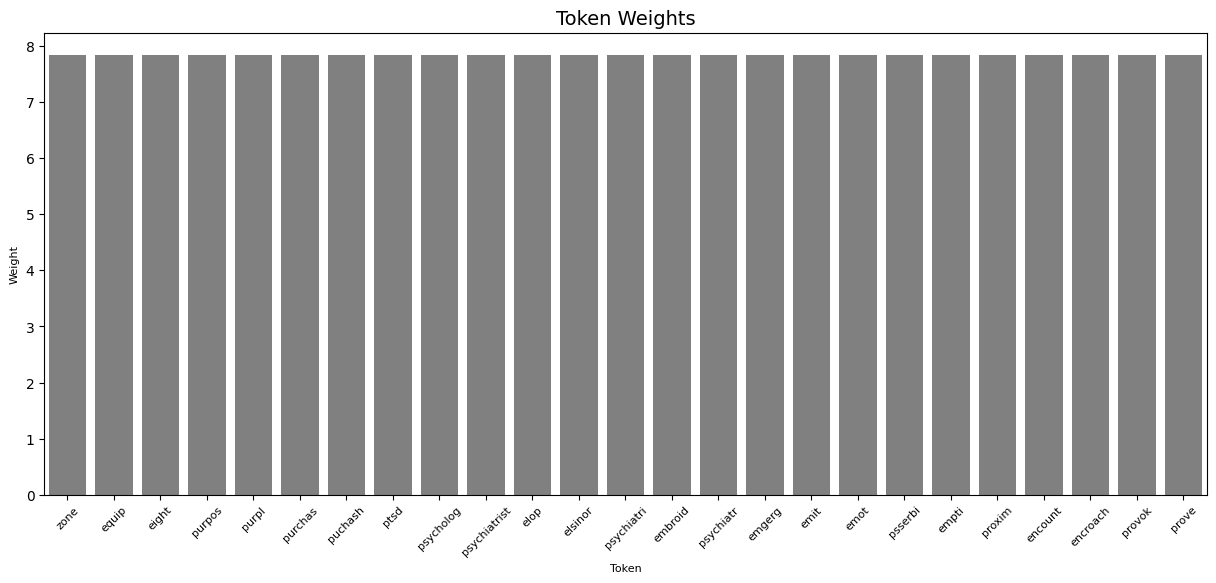

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(15, 6)) 

sns.barplot(x='token', 
            y='weight', 
            data=token_weight[0:25], 
            color="gray")    

plt.xticks(rotation=45, fontsize=8)

plt.xlabel('Token', fontsize=8)
plt.ylabel('Weight', fontsize=8)
plt.title('Token Weights', fontsize=14)

# plt.tight_layout()
plt.show()

In [70]:
tfidf_train = tfidf.fit_transform(X_train)

tfidf_test = tfidf.transform(X_test)

tfidf_train.shape, tfidf_test.shape

((1872, 1971), (469, 1971))

In [199]:
tfidf_train

<1872x1971 sparse matrix of type '<class 'numpy.float64'>'
	with 12079 stored elements in Compressed Sparse Row format>

# Model

### SVM: Support Vector Machines

- simple & interpretable machine learning model
- based in linear regression
- classification task
- supervized
    - input: labeled training data
    - model determines hyperplane that best discriminates between categories

### SVM: Tuning Parameters
- **regularization** parameter
    - can determine how this line is drawn
    - can increase accuracy of prediction
    - can lead to overfitting of the data
- **kernel** parameter
    - specifies how to model & transform data
    

In [72]:
# scikit-learn imports
from sklearn.svm import SVC
from sklearn.metrics import classification_report, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay

In [73]:
svm_model = SVC(kernel='linear')
type(svm_model)

sklearn.svm._classes.SVC

In [74]:
svm_model = svm_model.fit(tfidf_train, Y_train)


# Saved my model:

In [200]:
import pickle

# save
# with open('model.pkl','wb') as f:
#     pickle.dump(svm_model, f)

# # load
# with open('model.pkl', 'rb') as f:
#     clf2 = pickle.load(f)

# clf2.predict(X[0:1])

In [75]:
df_predicted_train_Y = svm_model.predict(tfidf_train)

print(df_predicted_train_Y[0:5])
print(Y_train[0:5])

[1. 0. 0. 1. 1.]
0    1.0
1    0.0
2    0.0
3    1.0
4    1.0
Name: Interesting, dtype: float64


In [78]:
print(pd.Series(df_predicted_train_Y).value_counts(), pd.Series(Y_train).value_counts())

0.0    1216
1.0     656
Name: count, dtype: int64 Interesting
0.0    1196
1.0     676
Name: count, dtype: int64


In [82]:
print(classification_report(Y_train, df_predicted_train_Y))

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.94      1196
         1.0       0.90      0.87      0.88       676

    accuracy                           0.92      1872
   macro avg       0.91      0.91      0.91      1872
weighted avg       0.92      0.92      0.92      1872



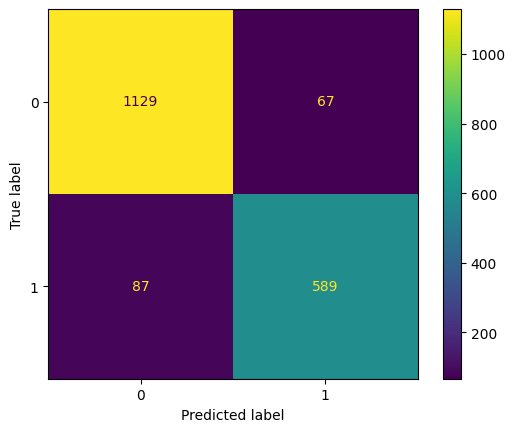

In [83]:
cm = confusion_matrix(Y_train, df_predicted_train_Y)
disp = ConfusionMatrixDisplay(cm)
disp.plot();


## Test Predictions

In [79]:
df_predicted_test_Y = svm_model.predict(tfidf_test)
print(df_predicted_test_Y[0:5])
print(Y_test[0:5])

[0. 1. 1. 1. 1.]
0    0.0
1    1.0
2    0.0
3    1.0
4    0.0
Name: Interesting, dtype: float64


In [80]:
print(classification_report(Y_test, df_predicted_test_Y))

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82       317
         1.0       0.62      0.66      0.64       152

    accuracy                           0.76       469
   macro avg       0.72      0.73      0.73       469
weighted avg       0.76      0.76      0.76       469



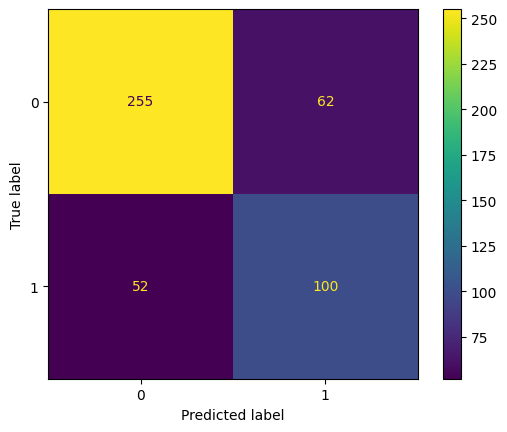

In [81]:
cm = confusion_matrix(Y_test, df_predicted_test_Y)
disp = ConfusionMatrixDisplay(cm)
disp.plot();

# Exporting for analysis

In [86]:
X_train_xport, X_test_xport , Y_train_xport, Y_test_xport = train_test_split(df_crime_logs['Summary'],
                                                     df_crime_logs['Interesting'],
                                                     test_size=0.2,
                                                     random_state=42)

In [97]:
X_train_xport = X_train_xport.reset_index(drop=True)
X_test_xport = X_test_xport.reset_index(drop=True)
Y_train_xport = Y_train_xport.reset_index(drop=True)
Y_test_xport = Y_test_xport.reset_index(drop=True)

In [98]:
len(df_predicted_test_Y)

469

In [109]:
ugh = {
    'summary': X_test_xport,
    'tokenized': X_test,
    'true_label': Y_test_xport,
    'predicted_label': df_predicted_test_Y
}
ugh_df = pd.DataFrame(ugh)
ugh_df.to_csv('ugh.csv', index=False)

In [110]:
ugh

{'summary': 0                     found bicycle frame missing wheels
 1      report of male in green scrubs with a wristban...
 2                         five electric chargers missing
 3      reporting party concerned for a man seen runni...
 4               unknown subject attempting to open doors
                              ...                        
 464                 water leak possible broken sprinkler
 465                        female swimming against rocks
 466    female motorist was yelling and honking at rep...
 467                large group on bikes destroying grass
 468                                              misdial
 Name: Summary, Length: 469, dtype: object,
 'tokenized': 0                          found bicycl frame miss wheel
 1      report male green scrub wristband possibl psyc...
 2                               five electr charger miss
 3      report parti concern man seen run canyon hospi...
 4                      unknown subject attempt open door
    

In [112]:
df_true_0_pred_1 = ugh_df[(ugh_df['true_label'] == 0) & (ugh_df['predicted_label'] == 1)]
# df_true_1_pred_0 = ugh_df[ugh_df['true_label'] == 1 & ugh_df['predicted_label'] == 0]


In [124]:
df_true_1_pred_0 = ugh_df[(ugh_df['true_label'] == 1) & (ugh_df['predicted_label'] == 0)]


In [125]:
print(len(df_true_0_pred_1))
print(len(df_true_1_pred_0))

62
52


In [126]:
true0_pred1 = pd.DataFrame(df_true_0_pred_1)
true1_pred0 = pd.DataFrame(df_true_1_pred_0)

# true0_pred1.to_csv('true0_pred1.csv', index=False)
# true1_pred0.to_csv('true1_pred0.csv', index=False)


true0_pred1 = true0_pred1.reset_index(drop=True)
true1_pred0 = true1_pred0.reset_index(drop=True)

true0_pred1.to_csv('true0_pred1.csv', index=False)
true1_pred0.to_csv('true1_pred0.csv', index=False)


# January Data

In [127]:
jan_month_df = pd.read_csv("z_cases_jan_2024.csv") 
jan_month_df


,Incident Type,Location,Date,Time,Summary,Disposition
0,Citizen Flagdown ...,Price Center,1/1/2024,1:48 AM,Request for escort to Eleanor Roosevelt Colleg...,Service Provided
1,Preserve the Peace ...,Mesa Apartments,1/1/2024,10:42 AM,Child custody exchange issue ...,Report Taken
2,Suspicious Person ...,Foodworx,1/1/2024,11:59 AM,Male wandering around screaming ...,Gone On Arrival
3,Medical Aid ...,Voigt Dr/ Campus Point Rd,1/1/2024,4:37 PM,Subject complaining of foot pain ...,Transported to Hospital
4,Suspicious Vehicle ...,Ola Parking,1/1/2024,6:47 PM,Male motorist driving erratically inside parki...,Verbal Warning Issued
...,...,...,...,...,...,...
526,Petty Theft - Micro Mobility Device ...,Pepper Canyon Apartments,1/9/2024,5:00 PM - 6:00 PM,"Secured electric scooter stolen, loss $399.00 ...",Report Taken
527,Animal Call ...,Gilman Drive,1/9/2024,7:03 PM,"Coyote in the loading dock, appears slightly d...",Unable to Locate
528,Suspicious Person ...,Tamarack Apartments,1/9/2024,7:54 PM,Unknown subject wandering around lobby ...,Unable to Locate
529,Medical Aid ...,Black gold,1/9/2024,8:27 PM,Needs lift assistance ...,Referred to Other Agency - San Diego Police De...


In [164]:
# def data_cleaning_fcn(any_df):
#     any_df.columns = any_df.columns.str.strip()
#     any_df = any_df.map(lambda x: x.lower() if isinstance(x, str) else x)
#     any_df['tokenized'] = any_df['Summary'].str.replace(f'[{string.punctuation}]', '', regex=True)
#     any_df['tokenized'] = any_df['tokenized'].apply(stem_text)
#     any_df['tokenized'] = any_df['tokenized'].apply(remove_stop_words)
#     any_df = any_df.dropna()
#     return any_df

    
jan_clean_df = data_cleaning_fcn(jan_month_df)

In [145]:
jan_clean_df

,Incident Type,Location,Date,Time,Summary,Disposition,text_stemmed,text_ss
0,citizen flagdown ...,price center,1/1/2024,1:48 am,request for escort to eleanor roosevelt colleg...,service provided,request for escort to eleanor roosevelt colleg,request escort eleanor roosevelt colleg
1,preserve the peace ...,mesa apartments,1/1/2024,10:42 am,child custody exchange issue ...,report taken,child custodi exchang issu,child custodi exchang issu
2,suspicious person ...,foodworx,1/1/2024,11:59 am,male wandering around screaming ...,gone on arrival,male wander around scream,male wander around scream
3,medical aid ...,voigt dr/ campus point rd,1/1/2024,4:37 pm,subject complaining of foot pain ...,transported to hospital,subject complain of foot pain,subject complain foot pain
4,suspicious vehicle ...,ola parking,1/1/2024,6:47 pm,male motorist driving erratically inside parki...,verbal warning issued,male motorist drive errat insid park structur,male motorist drive errat insid park structur
...,...,...,...,...,...,...,...,...
526,petty theft - micro mobility device ...,pepper canyon apartments,1/9/2024,5:00 pm - 6:00 pm,secured electric scooter stolen loss 39900 ...,report taken,secur electr scooter stolen loss 39900,secur electr scooter stolen loss 39900
527,animal call ...,gilman drive,1/9/2024,7:03 pm,coyote in the loading dock appears slightly di...,unable to locate,coyot in the load dock appear slightli disori,coyot load dock appear slightli disori
528,suspicious person ...,tamarack apartments,1/9/2024,7:54 pm,unknown subject wandering around lobby ...,unable to locate,unknown subject wander around lobbi,unknown subject wander around lobbi
529,medical aid ...,black gold,1/9/2024,8:27 pm,needs lift assistance ...,referred to other agency - san diego police de...,need lift assist,need lift assist


In [146]:
# tfidf_test = tfidf.transform(jan_clean_df['text_ss'])
print(type(jan_clean_df['text_ss']))
print(type(X_test))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [147]:
tfidf_jan_test = tfidf.transform(jan_clean_df['text_ss'])
print(type(tfidf_jan_test))

<class 'scipy.sparse._csr.csr_matrix'>


In [148]:
jan_predicted_y = svm_model.predict(tfidf_jan_test)
print(jan_predicted_y)

[0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0.
 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1.
 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.

In [149]:
jan_data = {
    'summary': jan_clean_df['Summary'],
    'tokenized': jan_clean_df['text_ss'],
    'predicted_label': jan_predicted_y
}
jan_data = pd.DataFrame(jan_data)
# jan_data.to_csv('jan_data_predicted.csv', index=False)

In [153]:
only_jan_true_predictions = jan_data[jan_data['predicted_label'] == 1]
only_jan_true_predictions.to_csv('exports/jan_data_predicted_1s.csv', index=False)

In [152]:
only_jan_false_predictions = jan_data[jan_data['predicted_label'] == 0]
only_jan_false_predictions.to_csv('exports/jan_data_predicted_0s.csv', index=False)

# June 1 to 11

In [166]:
jun_month_df = pd.read_csv('../playground/june_2024_1_to_11.csv')
jun_clean_df = data_cleaning_fcn(jun_month_df)
jun_clean_df.head(10)

,Incident Type,Location,Date,Time,Summary,Disposition,tokenized
0,alcohol contact,stewart hall,6/1/2024,12:04 am,music and people yelling at location,referred to student conduct,music peopl yell locat
1,information,kaleidoscope,6/1/2024,12:25 am,accidental dial,logged event,accident dial
2,noise disturbance,one miramar street,6/1/2024,12:32 am,people being loud and possible smell of marijuana,quiet on arrival,peopl loud possibl smell marijuana
3,lost property,brown hall,6/1/2024,12:15 am,friend may have dropped her phone and is track...,report taken,friend may drop phone track campu
4,information,mahaila avenue,6/1/2024,3:34 am,reporting party requesting a welfare check on ...,referred to other agency - san diego police de...,report parti request welfar check daughter
5,vandalism,cala,6/1/2024,3:35 am,keycard appears to be tampered with possibly r...,disposition rereferred to other department - ucsd,keycard appear tamper possibl remov
6,information,mahaila,6/1/2024,7:23 am,female caller cancelling previous call for ser...,referred to other agency - san diego police de...,femal caller cancel previou call servic
7,information,shiley eye institute,6/1/2024,7:35 am,planned power outage at location,information,plan power outag locat
8,petty theft,miramar street,6/1/2024,9:25 am,between building 1 and 2 bike racks and multip...,report taken,build 1 2 bike rack multipl bike stolen
9,information,capa,6/1/2024,10:57 am,secondhand information ground door does not op...,referred to other department - ucsd,secondhand inform ground door doe open insid


In [173]:
tfidf_jun_test = tfidf.transform(jun_clean_df['tokenized'])
print(type(tfidf_jun_test))

<class 'scipy.sparse._csr.csr_matrix'>


In [174]:
jun_predicted_y = svm_model.predict(tfidf_jun_test)
print(jun_predicted_y)

[0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 0.
 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 1.
 1. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0.
 1. 0. 1. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1.
 1. 1. 0. 0. 0. 0. 0.]


In [175]:
jun_data = {
    'summary': jun_clean_df['Summary'],
    'tokenized': jun_clean_df['tokenized'],
    'predicted_label': jun_predicted_y
}

jun_data = pd.DataFrame(jun_data)

In [176]:
jun_data

,summary,tokenized,predicted_label
0,music and people yelling at location,music peopl yell locat,0.0
1,accidental dial,accident dial,0.0
2,people being loud and possible smell of marijuana,peopl loud possibl smell marijuana,0.0
3,friend may have dropped her phone and is track...,friend may drop phone track campu,1.0
4,reporting party requesting a welfare check on ...,report parti request welfar check daughter,0.0
...,...,...,...
218,smoking cigarettes,smoke cigarett,0.0
219,smoking cigarettes,smoke cigarett,0.0
220,group of people being loud and dancing on balcony,group peopl loud danc balconi,0.0
221,"adult male yelling at a student, crossed road ...",adult male yell student cross road toward regent,0.0


In [177]:
only_jun_true_predictions = jun_data[jun_data['predicted_label'] == 1]
only_jun_true_predictions.to_csv('exports/jun_data_predicted_1s.csv', index=False)

In [178]:
only_jun_false_predictions = jun_data[jun_data['predicted_label'] == 0]
only_jun_false_predictions.to_csv('exports/jun_data_predicted_0s.csv', index=False)
